In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\tharn\Downloads\ML_Dataset_final.csv')
df

,User ID,Location,Latitude,Longitude,Weather Condition,Temperature (°C),Humidity (%),Music Genre Preferences
0,1,"Baton Rouge, LA",30.4515,-91.1871,Clear,18.12,84.99,"Country,Folk"
1,2,"Baltimore, MD",39.2904,-76.6122,Cloudy,13.74,69.61,"Rock,Alternative"
2,3,"Indianapolis, IN",39.7684,-86.1581,Cloudy,25.70,38.70,"Latin,Reggaeton,Salsa"
3,4,"Buffalo, NY",42.8802,-78.8393,Snowy,38.73,76.75,"Country,Folk"
4,5,"Memphis, TN",35.1495,-90.0490,Cloudy,26.91,30.95,"Hip-Hop,R&B,Pop"
...,...,...,...,...,...,...,...,...
875137,875138,"Cleveland, OH",41.4993,-81.6944,Clear,8.65,47.00,"Hip-Hop,R&B,Pop"
875138,875139,"Raleigh, NC",35.7796,-78.6382,Sunny,8.48,89.53,"Country,Folk"
875139,875140,"Cincinnati, OH",39.1031,-84.5120,Cloudy,27.98,50.09,"Rock,Alternative"
875140,875141,"Fresno, CA",36.7468,-119.7726,Rainy,23.90,56.12,"Pop,Rock,Jazz"


In [94]:
unique_classes = df['Music Genre Preferences'].unique()

# Print the unique classes
print("Unique Classes in the Dataset:")
for cls in unique_classes:
    print(cls)

Unique Classes in the Dataset:
Country,Folk
Rock,Alternative
Latin,Reggaeton,Salsa
Hip-Hop,R&B,Pop
Pop,Rock,Jazz


A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If your data deals with multiple classes, you can take any two classes. Steps below (refer below diagram for understanding):

Calculate the mean for each class (also called as class centroid)

0.19992069858377268
0.19978472065104863


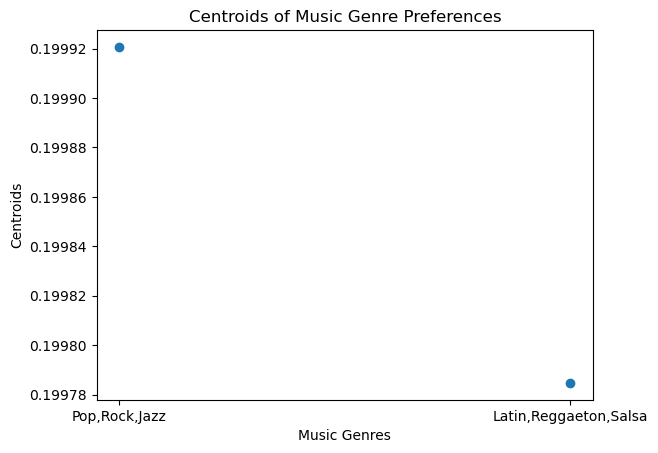

In [95]:
centroid1 = np.mean(df['Music Genre Preferences'] == 'Pop,Rock,Jazz')
centroid2 = np.mean(df['Music Genre Preferences'] == 'Latin,Reggaeton,Salsa')
print(centroid1)
print(centroid2)

centroids = [centroid1, centroid2]
genres = ['Pop,Rock,Jazz', 'Latin,Reggaeton,Salsa']

plt.scatter(genres, centroids)
plt.xlabel('Music Genres')
plt.ylabel('Centroids')
plt.title('Centroids of Music Genre Preferences')
plt.show()

Calculate spread (standard deviation) for each class

0.399940511653357
0.3998384499337591


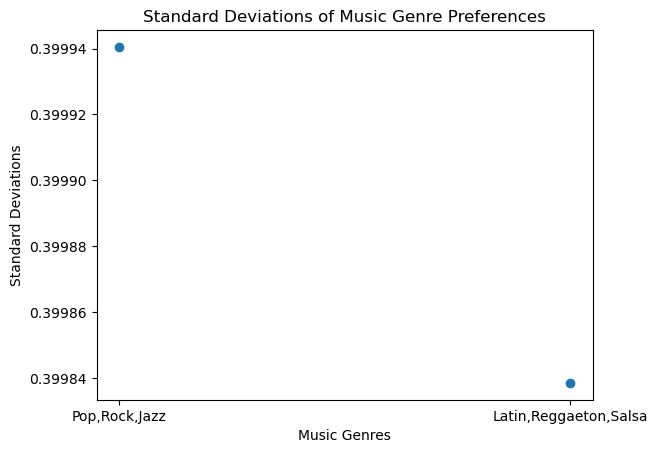

In [96]:
std1 = np.std(df['Music Genre Preferences'] == 'Pop,Rock,Jazz')
std2 = np.std(df['Music Genre Preferences'] == 'Latin,Reggaeton,Salsa')

print(std1)
print(std2)

standard_deviations = [std1, std2]
genres = ['Pop,Rock,Jazz', 'Latin,Reggaeton,Salsa']

plt.scatter(genres, standard_deviations)
plt.xlabel('Music Genres')
plt.ylabel('Standard Deviations')
plt.title('Standard Deviations of Music Genre Preferences')
plt.show()

Calculate the distance between mean vectors between classes
(Suggestion: numpy.linalg.norm(centroid1 – centroid2) gives the Euclidean 
distance between two centroids.)

In [97]:
Euclidian_distance = np.linalg.norm(centroid1 - centroid2)
print(Euclidian_distance)

0.00013597793272404624


A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and  variance from the available data.

Mean: 19.99
Variance: 133.32


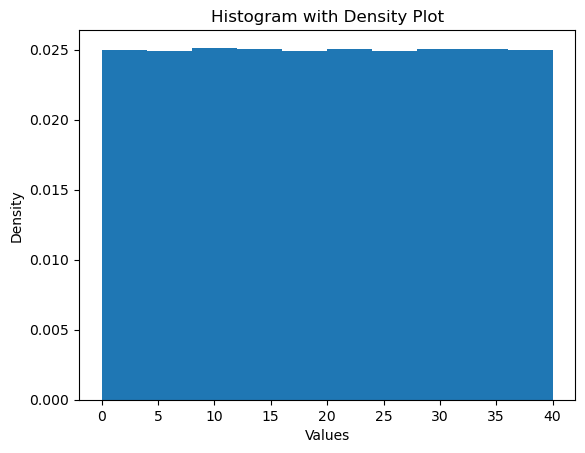

In [98]:
plt.hist(df['Temperature (°C)'], density=True)

# Add labels and a title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram with Density Plot')

# Calculate the mean and variance
mean = np.mean(df['Temperature (°C)'])
variance = np.var(df['Temperature (°C)'])

print(f"Mean: {mean:.2f}")
print(f"Variance: {variance:.2f}")

# Show the plot
plt.show()

A3. Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 
to 10. Make a plot of the distance and observe the nature of this graph.


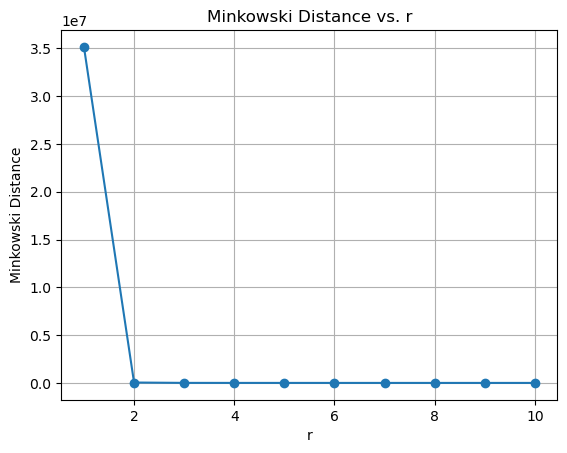

In [99]:
# Define a range of r values from 1 to 10
r_values = np.arange(1, 11)

# Calculate Minkowski distance for each r
distances = []
for r in r_values:
    distance = np.power(np.sum(np.power(np.abs(df['Temperature (°C)'] - df['Humidity (%)']), r)), 1/r)
    distances.append(distance)

# Create a plot
plt.plot(r_values, distances, marker='o', linestyle='-')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)

# Show the plot
plt.show()

A4. Divide dataset in your project into two parts – train & test set.

In [100]:
from sklearn.model_selection import train_test_split


X = df['Humidity (%)']
X_array = X.to_numpy()
X_reshaped = X_array.reshape(-1, 1)
X = X_reshaped
y = df['Music Genre Preferences'] == 'Pop,Rock,Jazz'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 612599
Test set size: 262543


A5. Train a kNN classifier (k =3) using the training set obtained from above exercise

In [101]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier with the reshaped data
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

A6. Test the accuracy of the kNN using the test set obtained from above exercise

In [102]:
neigh.score(X_test, y_test)

0.7395893244154291

A7. Use the predict() function to study the prediction behavior of the classifier for test vectors.

In [103]:
neigh.predict(X_test)

array([False, False, False, ..., False, False, False])

A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 11 and make an accuracy plot.

In [104]:
neigh = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier with the reshaped data
print("Fit", neigh.fit(X, y))
print("Score: ", neigh.score(X_test, y_test))
print("Predict: ", neigh.predict(X_test))

Fit KNeighborsClassifier(n_neighbors=1)
Score:  0.6826538890772178
Predict:  [False False False ... False False  True]


for k= 1
Accuracy: 0.68
for k= 2
Accuracy: 0.78
for k= 3
Accuracy: 0.74
for k= 4
Accuracy: 0.79
for k= 5
Accuracy: 0.77
for k= 6
Accuracy: 0.79
for k= 7
Accuracy: 0.78
for k= 8
Accuracy: 0.79
for k= 9
Accuracy: 0.79
for k= 10
Accuracy: 0.80
for k= 11
Accuracy: 0.79


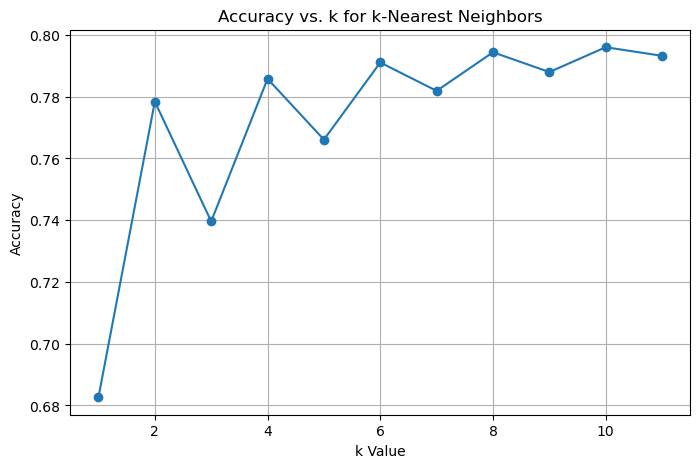

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize an empty list to store accuracy values
accuracy = []

for k in range(1, 12):
    print("for k=", k)
    
    # Create and fit the kNN classifier with the current k
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X, y)
    
    # Make predictions on the test data
    y_pred = neigh.predict(X_test)

    # Calculate accuracy by comparing predicted labels to actual labels
    acc = accuracy_score(y_test, y_pred)

    # Append the accuracy value to the list
    accuracy.append(acc)

    print(f"Accuracy: {acc:.2f}")

# Now 'accuracy' contains the accuracy values for different values of k
k = range(1, 12)
plt.figure(figsize=(8, 5))
plt.plot(k, accuracy, marker='o', linestyle='-')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for k-Nearest Neighbors')
plt.grid(True)
plt.show()

A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the 
other performance metrics such as precision, recall and F1-Score measures for both training and test 
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

In [106]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


# Predict labels for both training and test data
y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# Calculate confusion matrices
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# Calculate precision, recall, and F1-score for both training and test data
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')

precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print("Confusion Matrix (Training Data):\n", confusion_matrix_train)
print("Confusion Matrix (Test Data):\n", confusion_matrix_test)

print("Precision (Training Data):", precision_train)
print("Recall (Training Data):", recall_train)
print("F1-Score (Training Data):", f1_score_train)

print("Precision (Test Data):", precision_test)
print("Recall (Test Data):", recall_test)
print("F1-Score (Test Data):", f1_score_test)

Confusion Matrix (Training Data):
 [[485398   4770]
 [121057   1374]]
Confusion Matrix (Test Data):
 [[207933   2082]
 [ 51947    581]]
Precision (Training Data): 0.6851188455337459
Recall (Training Data): 0.7946013623920378
F1-Score (Training Data): 0.7126074256852074
Precision (Test Data): 0.6836812692522262
Recall (Test Data): 0.7942089486293674
F1-Score (Test Data): 0.7121621857023025


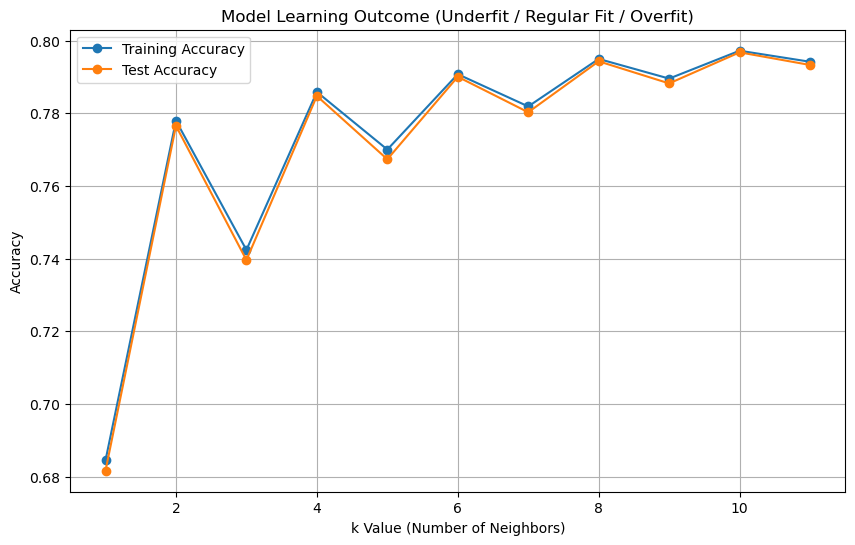

In [107]:
train_accuracies = []
test_accuracies = []

# Define a range of k values (hyperparameter) to experiment with
k_values = range(1, 12)

# Train and evaluate the model for different values of k
for k in k_values:
    # Create and fit the kNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    
    # Predict labels for training and test data
    y_train_pred = knn_classifier.predict(X_train)
    y_test_pred = knn_classifier.predict(X_test)
    
    # Calculate training and test accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracy values to the respective lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Create a plot to visualize training and test accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('k Value (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Model Learning Outcome (Underfit / Regular Fit / Overfit)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()